In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Configurazione per visualizzazioni migliori
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Carica il dataset
df = pd.read_excel("df_merge.xlsx")
print(f"Dataset shape: {df.shape}")
print(f"\nColonne numeriche disponibili:")
print(df.select_dtypes(include=[np.number]).columns.tolist())


Dataset shape: (1044, 34)

Colonne numeriche disponibili:
['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']


# Analisi delle Correlazioni - Dataset Student Alcohol Consumption

Questo notebook contiene grafici di correlazione interessanti per analizzare le relazioni tra le variabili del dataset.


In [4]:
# Seleziona solo le colonne numeriche per l'analisi di correlazione
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Rimuovi colonne che non hanno senso nella correlazione (se presenti)
# Mantieni solo quelle rilevanti
cols_to_keep = ['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 
                'health', 'absences', 'G1', 'G2', 'G3']

# Filtra solo le colonne presenti nel dataset
numeric_cols = [col for col in cols_to_keep if col in df.columns]

# Crea matrice di correlazione
corr_matrix = df[numeric_cols].corr()

print("Matrice di correlazione creata!")
print(f"Variabili incluse: {len(numeric_cols)}")


Matrice di correlazione creata!
Variabili incluse: 15


## 1. Heatmap Completa delle Correlazioni

Visualizzazione completa di tutte le correlazioni tra variabili numeriche.


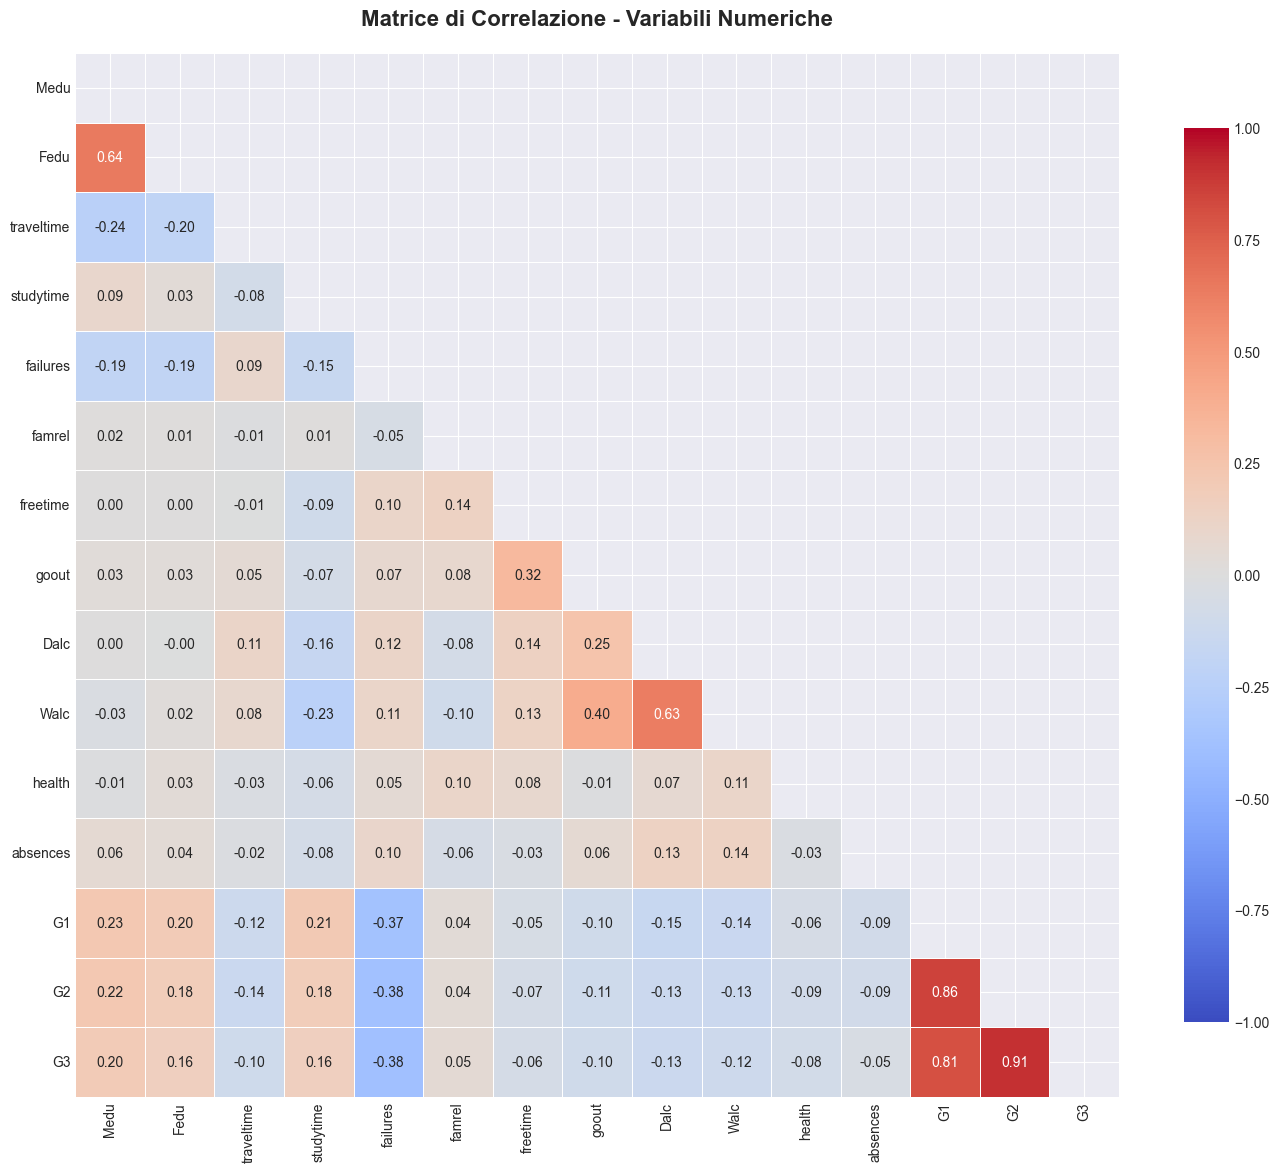

In [5]:
# Heatmap completa delle correlazioni
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Maschera per mostrare solo triangolo inferiore

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            mask=mask,
            vmin=-1, 
            vmax=1)

plt.title('Matrice di Correlazione - Variabili Numeriche', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 2. Correlazioni con i Voti Finali (G3)

Focus sulle correlazioni tra G3 (voto finale) e le altre variabili.


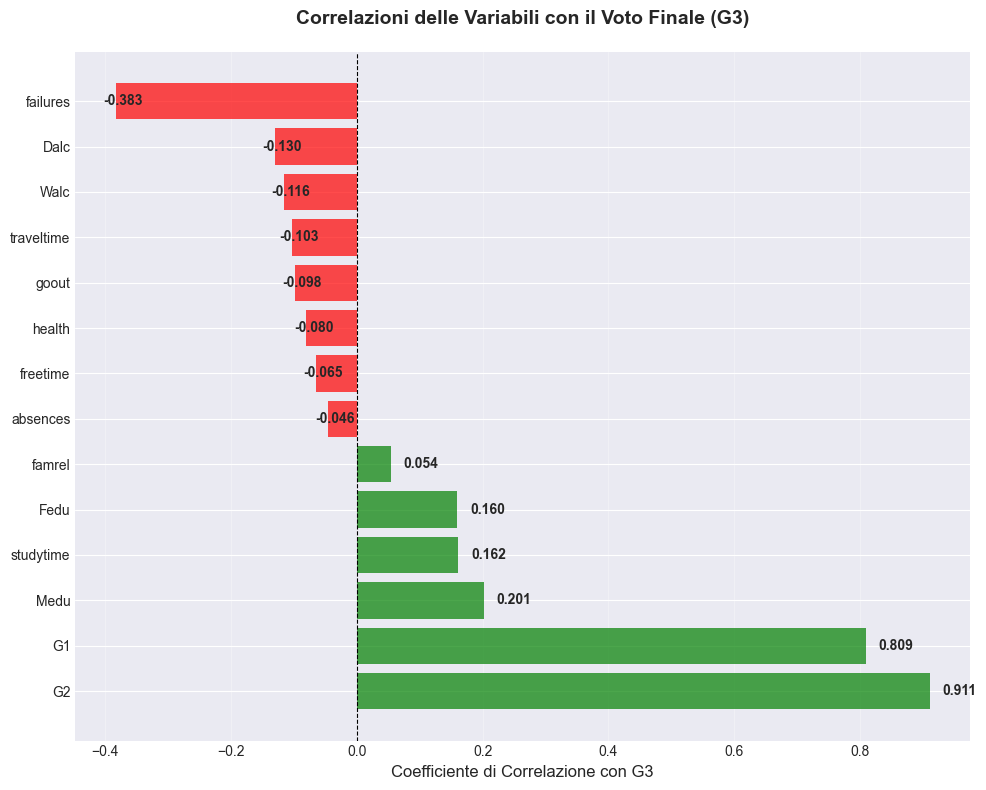


Top 5 correlazioni positive con G3:
G2           0.910743
G1           0.809142
Medu         0.201472
studytime    0.161629
Fedu         0.159796
Name: G3, dtype: float64

Top 5 correlazioni negative con G3:
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


In [6]:
# Correlazioni con G3
g3_corr = corr_matrix['G3'].sort_values(ascending=False)

# Rimuovi G3 stesso
g3_corr = g3_corr[g3_corr.index != 'G3']

# Visualizza le correlazioni con G3
plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in g3_corr.values]
bars = plt.barh(g3_corr.index, g3_corr.values, color=colors, alpha=0.7)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Coefficiente di Correlazione con G3', fontsize=12)
plt.title('Correlazioni delle Variabili con il Voto Finale (G3)', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

# Aggiungi valori sulle barre
for i, (idx, val) in enumerate(zip(g3_corr.index, g3_corr.values)):
    plt.text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.3f}', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop 5 correlazioni positive con G3:")
print(g3_corr.head())
print("\nTop 5 correlazioni negative con G3:")
print(g3_corr.tail())


## 3. Correlazione tra i Voti (G1, G2, G3)

Analisi della correlazione tra i voti nei diversi periodi.


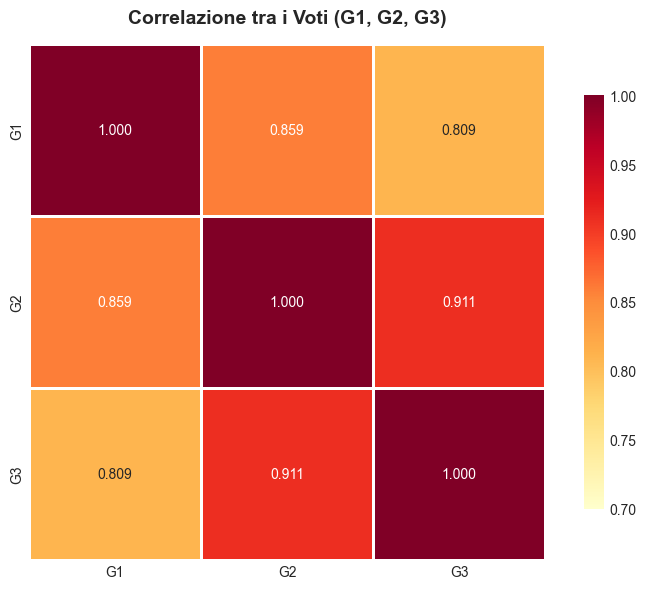

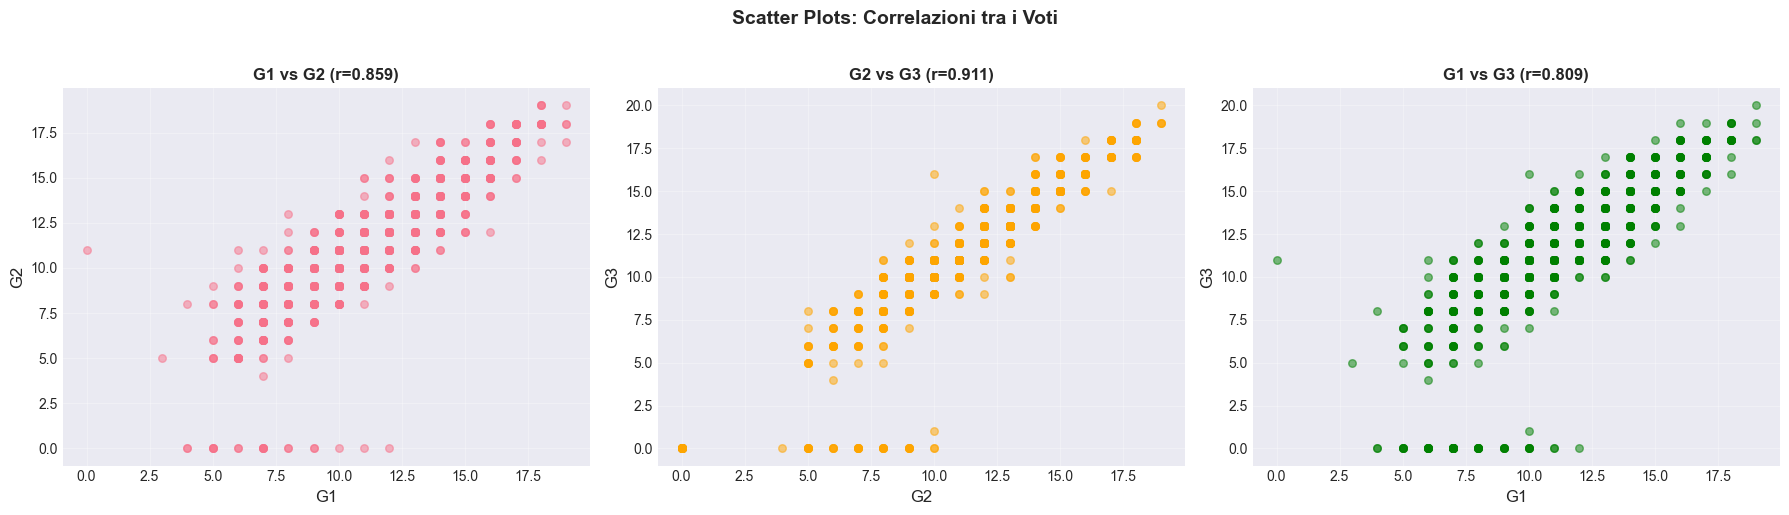

In [7]:
# Matrice di correlazione tra i voti
grades_cols = ['G1', 'G2', 'G3']
grades_corr = df[grades_cols].corr()

# Heatmap specifica per i voti
plt.figure(figsize=(8, 6))
sns.heatmap(grades_corr, 
            annot=True, 
            fmt='.3f', 
            cmap='YlOrRd', 
            square=True,
            linewidths=2,
            cbar_kws={"shrink": 0.8},
            vmin=0.7, 
            vmax=1.0)

plt.title('Correlazione tra i Voti (G1, G2, G3)', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Scatter plot matrix dei voti
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# G1 vs G2
axes[0].scatter(df['G1'], df['G2'], alpha=0.5, s=30)
axes[0].set_xlabel('G1', fontsize=12)
axes[0].set_ylabel('G2', fontsize=12)
axes[0].set_title(f'G1 vs G2 (r={grades_corr.loc["G1", "G2"]:.3f})', fontweight='bold')
axes[0].grid(alpha=0.3)

# G2 vs G3
axes[1].scatter(df['G2'], df['G3'], alpha=0.5, s=30, color='orange')
axes[1].set_xlabel('G2', fontsize=12)
axes[1].set_ylabel('G3', fontsize=12)
axes[1].set_title(f'G2 vs G3 (r={grades_corr.loc["G2", "G3"]:.3f})', fontweight='bold')
axes[1].grid(alpha=0.3)

# G1 vs G3
axes[2].scatter(df['G1'], df['G3'], alpha=0.5, s=30, color='green')
axes[2].set_xlabel('G1', fontsize=12)
axes[2].set_ylabel('G3', fontsize=12)
axes[2].set_title(f'G1 vs G3 (r={grades_corr.loc["G1", "G3"]:.3f})', fontweight='bold')
axes[2].grid(alpha=0.3)

plt.suptitle('Scatter Plots: Correlazioni tra i Voti', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 4. Correlazione tra Consumo di Alcol e Performance Scolastica

Analisi dell'impatto del consumo di alcol (Dalc = weekday alcohol, Walc = weekend alcohol) sui voti.


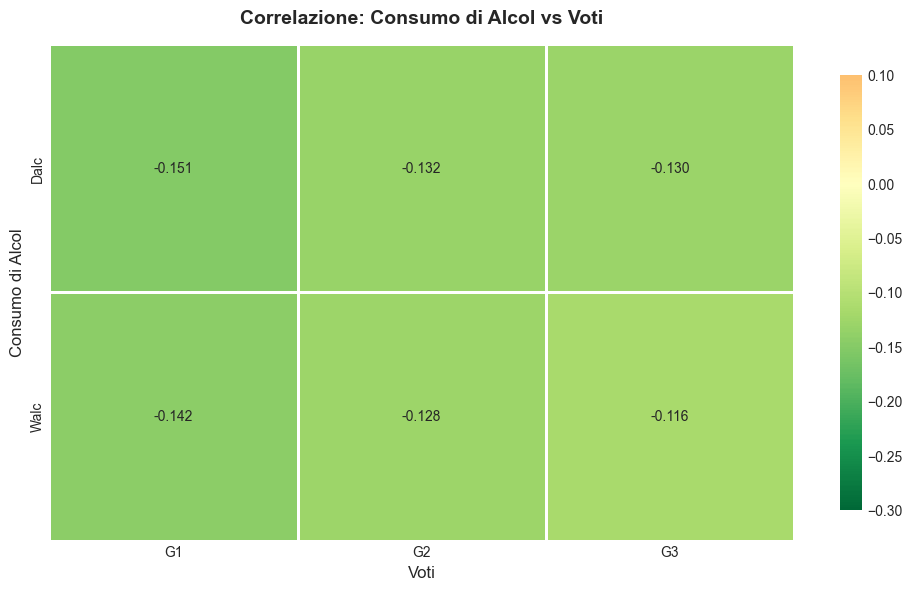

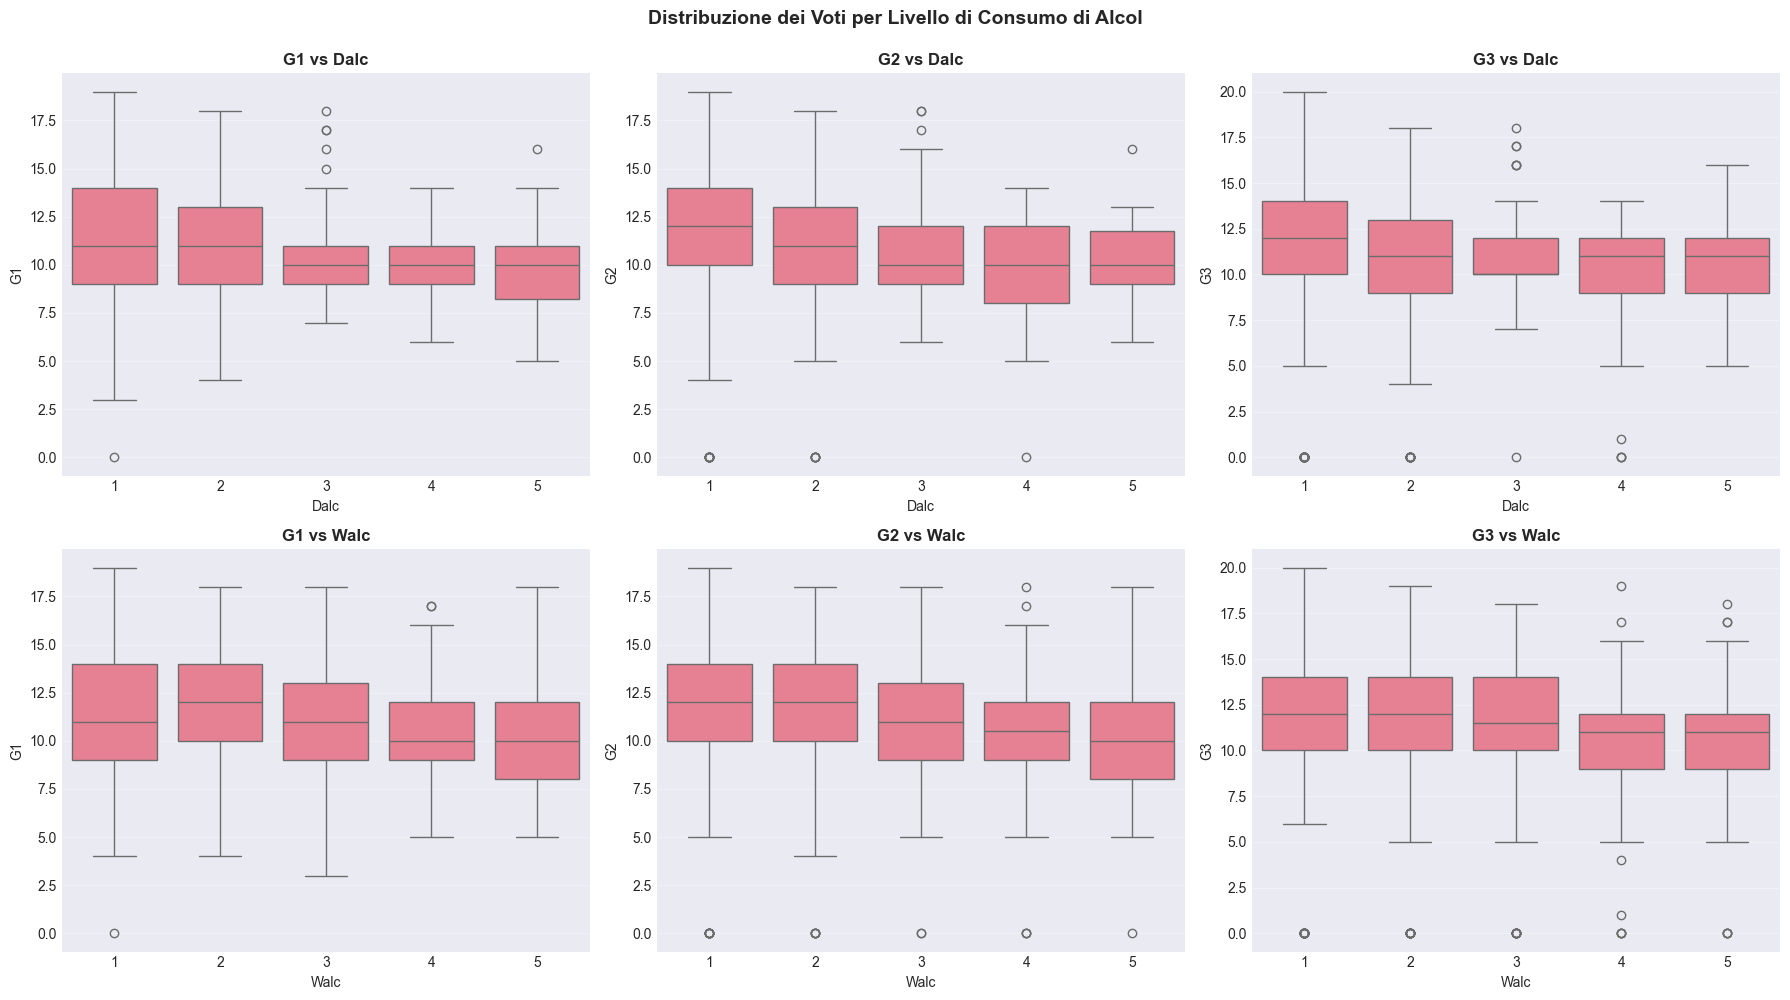

In [8]:
# Analisi correlazione alcol-voti
alcohol_cols = ['Dalc', 'Walc']
grade_cols = ['G1', 'G2', 'G3']

# Crea heatmap specifica
alcohol_grades = df[alcohol_cols + grade_cols].corr()
alcohol_grades_subset = alcohol_grades.loc[alcohol_cols, grade_cols]

plt.figure(figsize=(10, 6))
sns.heatmap(alcohol_grades_subset, 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlGn_r', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            vmin=-0.3, 
            vmax=0.1)

plt.title('Correlazione: Consumo di Alcol vs Voti', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Consumo di Alcol', fontsize=12)
plt.xlabel('Voti', fontsize=12)
plt.tight_layout()
plt.show()

# Box plots per visualizzare la relazione
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, alc_col in enumerate(alcohol_cols):
    for j, grade_col in enumerate(grade_cols):
        sns.boxplot(data=df, x=alc_col, y=grade_col, ax=axes[i, j])
        axes[i, j].set_title(f'{grade_col} vs {alc_col}', fontweight='bold')
        axes[i, j].grid(axis='y', alpha=0.3)

plt.suptitle('Distribuzione dei Voti per Livello di Consumo di Alcol', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 5. Correlazioni con Tempo di Studio e Assenze

Analisi delle variabili che potrebbero influenzare maggiormente i voti.


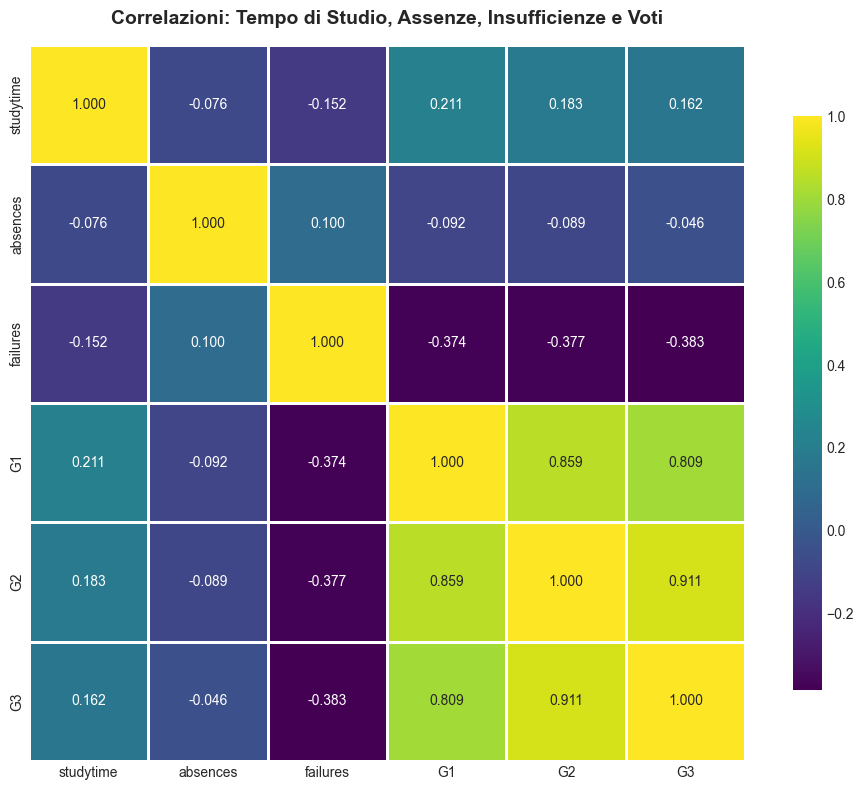

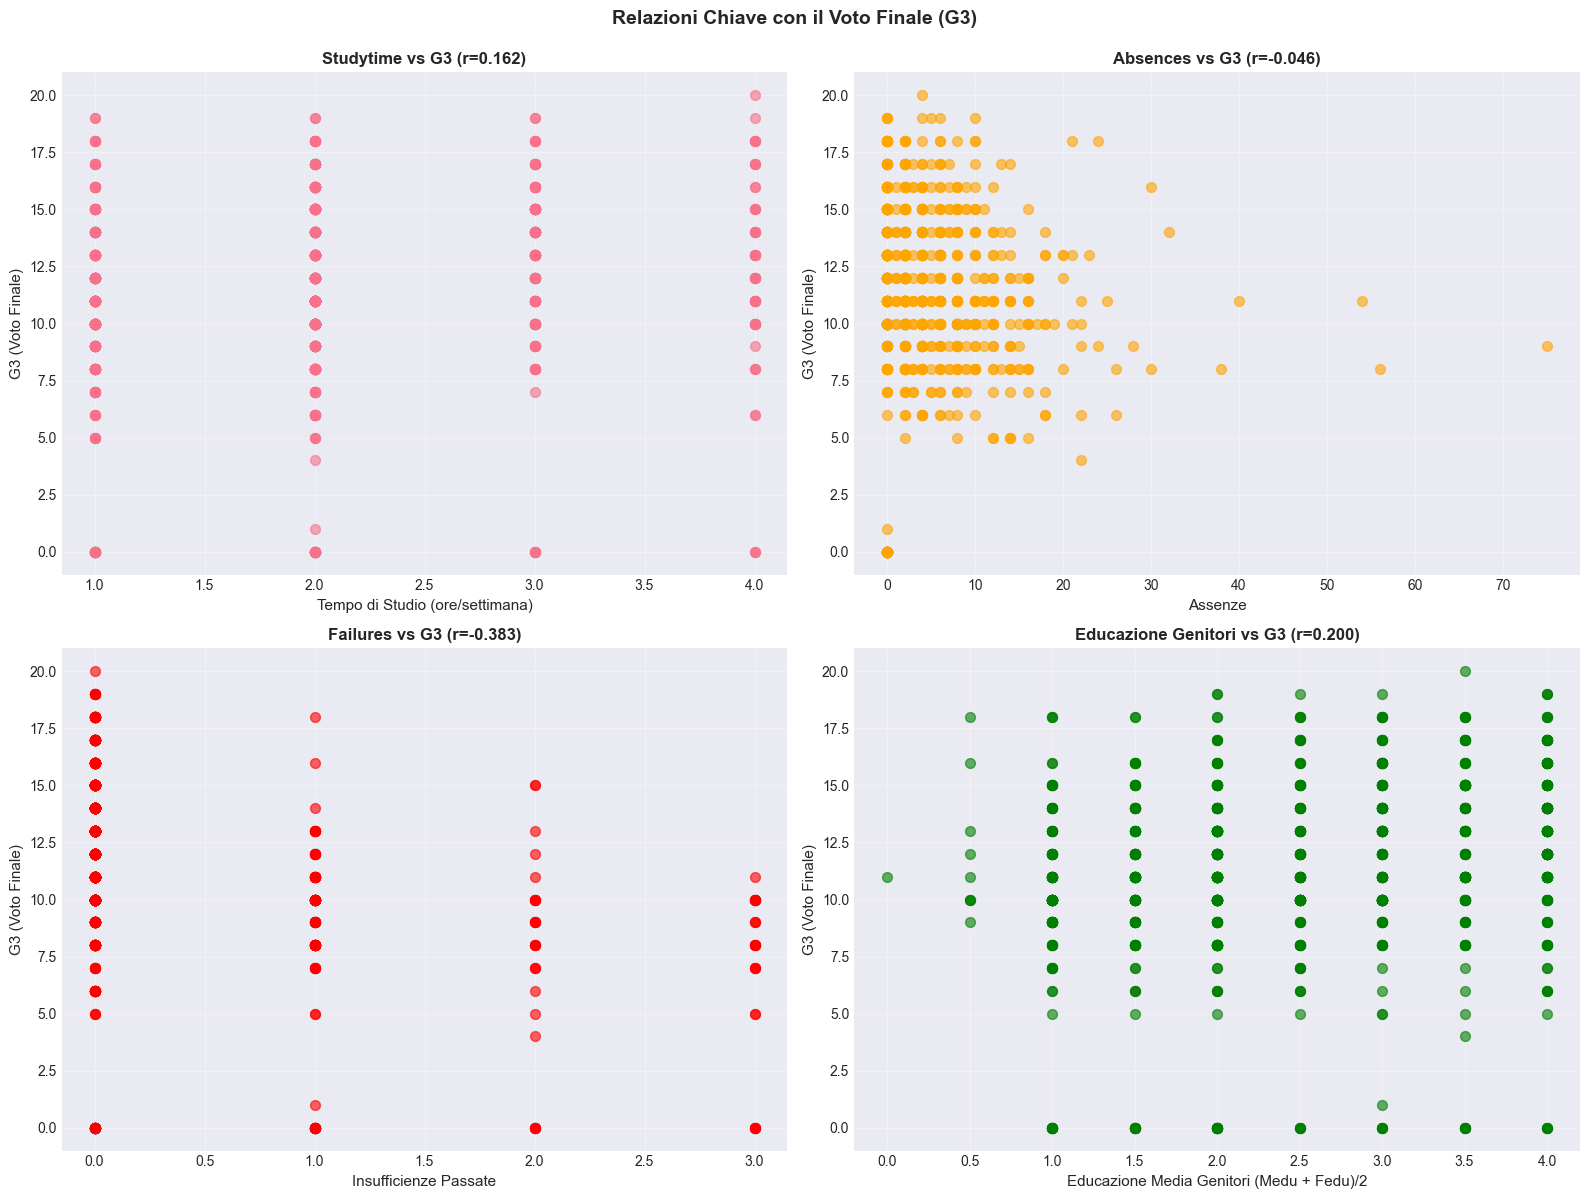

In [9]:
# Focus su studytime, absences, failures
important_vars = ['studytime', 'absences', 'failures', 'G1', 'G2', 'G3']
important_corr = df[important_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(important_corr, 
            annot=True, 
            fmt='.3f', 
            cmap='viridis', 
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('Correlazioni: Tempo di Studio, Assenze, Insufficienze e Voti', 
          fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Scatter plots specifici
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Studytime vs G3
axes[0, 0].scatter(df['studytime'], df['G3'], alpha=0.6, s=50)
axes[0, 0].set_xlabel('Tempo di Studio (ore/settimana)', fontsize=11)
axes[0, 0].set_ylabel('G3 (Voto Finale)', fontsize=11)
axes[0, 0].set_title(f'Studytime vs G3 (r={df["studytime"].corr(df["G3"]):.3f})', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Absences vs G3
axes[0, 1].scatter(df['absences'], df['G3'], alpha=0.6, s=50, color='orange')
axes[0, 1].set_xlabel('Assenze', fontsize=11)
axes[0, 1].set_ylabel('G3 (Voto Finale)', fontsize=11)
axes[0, 1].set_title(f'Absences vs G3 (r={df["absences"].corr(df["G3"]):.3f})', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Failures vs G3
axes[1, 0].scatter(df['failures'], df['G3'], alpha=0.6, s=50, color='red')
axes[1, 0].set_xlabel('Insufficienze Passate', fontsize=11)
axes[1, 0].set_ylabel('G3 (Voto Finale)', fontsize=11)
axes[1, 0].set_title(f'Failures vs G3 (r={df["failures"].corr(df["G3"]):.3f})', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Educazione genitori vs G3
medu_fedu_avg = (df['Medu'] + df['Fedu']) / 2
axes[1, 1].scatter(medu_fedu_avg, df['G3'], alpha=0.6, s=50, color='green')
axes[1, 1].set_xlabel('Educazione Media Genitori (Medu + Fedu)/2', fontsize=11)
axes[1, 1].set_ylabel('G3 (Voto Finale)', fontsize=11)
corr_edu = medu_fedu_avg.corr(df['G3'])
axes[1, 1].set_title(f'Educazione Genitori vs G3 (r={corr_edu:.3f})', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Relazioni Chiave con il Voto Finale (G3)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## 6. Correlazioni tra Attività Sociali e Performance

Analisi delle correlazioni tra attività sociali (goout, freetime) e voti.


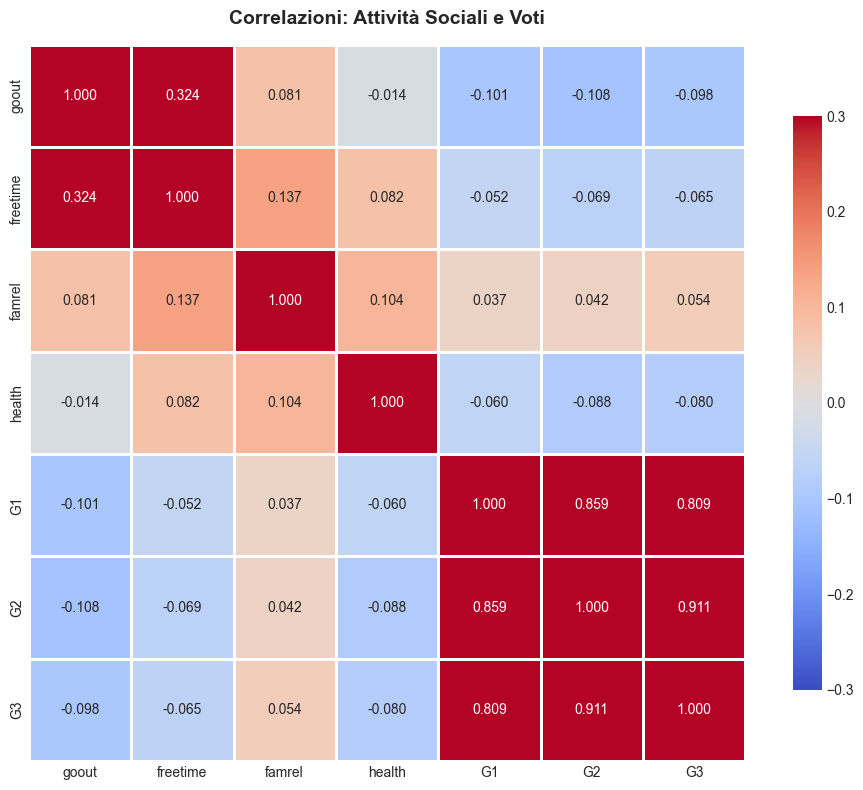

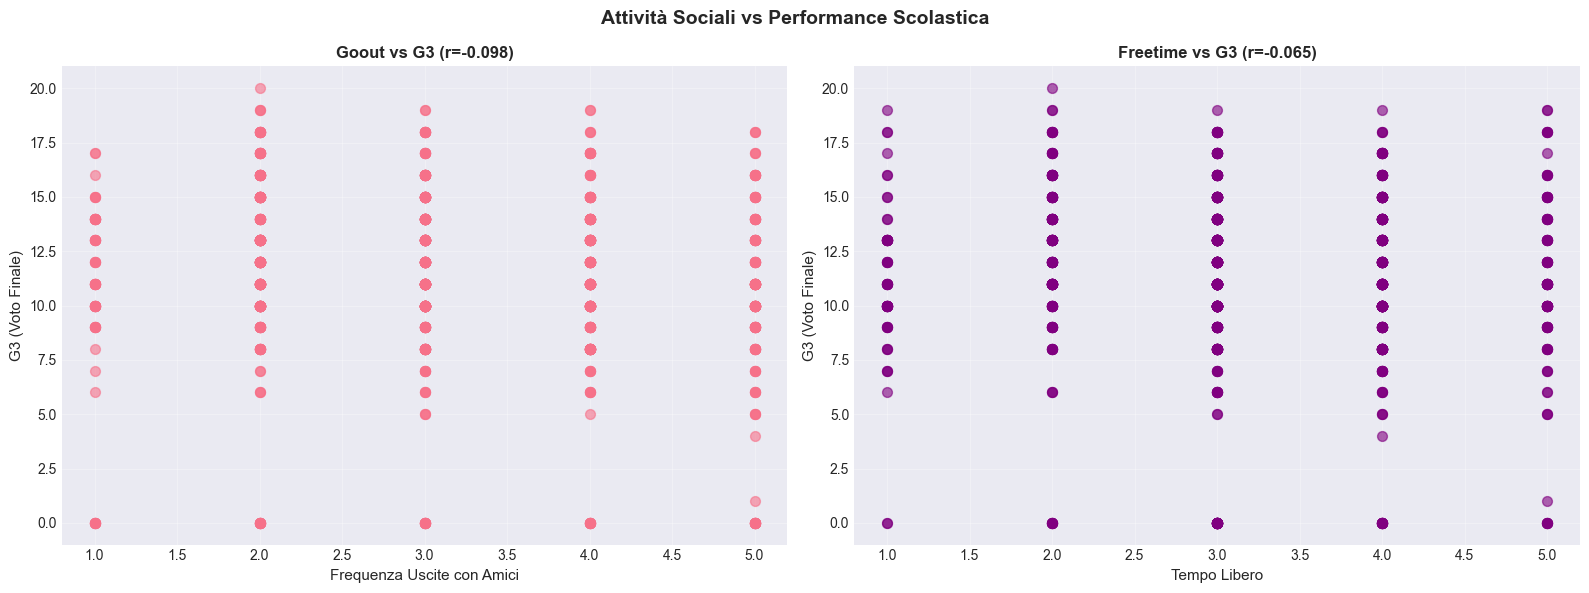

In [10]:
# Analisi attività sociali
social_vars = ['goout', 'freetime', 'famrel', 'health', 'G1', 'G2', 'G3']
social_corr = df[social_vars].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(social_corr, 
            annot=True, 
            fmt='.3f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8},
            vmin=-0.3, 
            vmax=0.3)

plt.title('Correlazioni: Attività Sociali e Voti', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Goout vs G3
axes[0].scatter(df['goout'], df['G3'], alpha=0.6, s=50)
axes[0].set_xlabel('Frequenza Uscite con Amici', fontsize=11)
axes[0].set_ylabel('G3 (Voto Finale)', fontsize=11)
axes[0].set_title(f'Goout vs G3 (r={df["goout"].corr(df["G3"]):.3f})', fontweight='bold')
axes[0].grid(alpha=0.3)

# Freetime vs G3
axes[1].scatter(df['freetime'], df['G3'], alpha=0.6, s=50, color='purple')
axes[1].set_xlabel('Tempo Libero', fontsize=11)
axes[1].set_ylabel('G3 (Voto Finale)', fontsize=11)
axes[1].set_title(f'Freetime vs G3 (r={df["freetime"].corr(df["G3"]):.3f})', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.suptitle('Attività Sociali vs Performance Scolastica', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 7. Matrice di Correlazione Clusterizzata

Visualizzazione della matrice di correlazione con clustering gerarchico per raggruppare variabili simili.


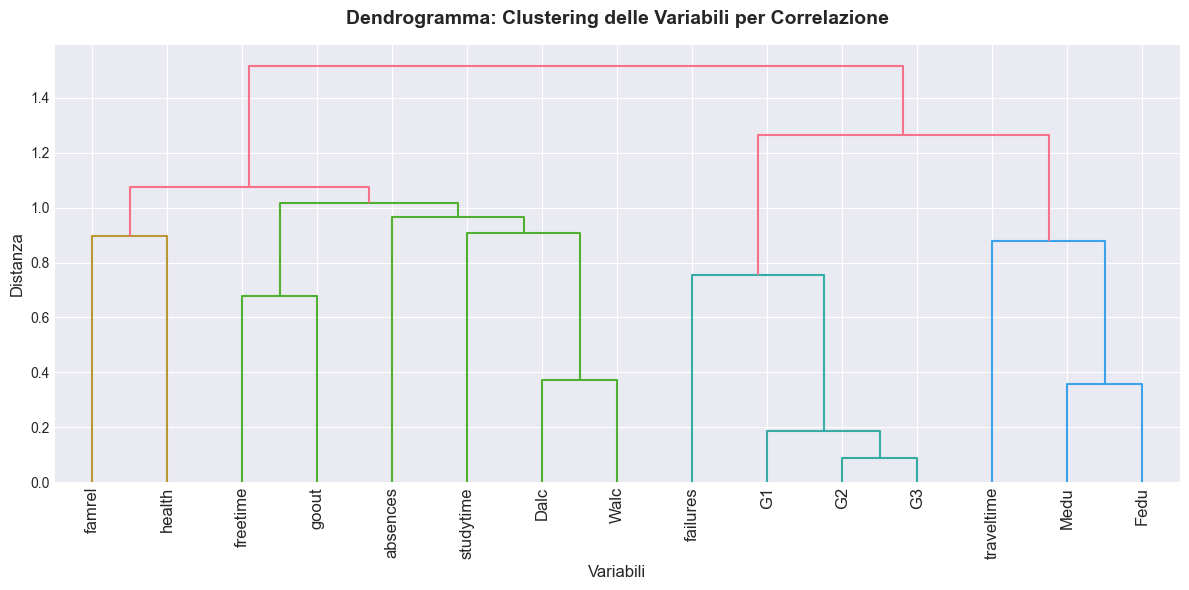

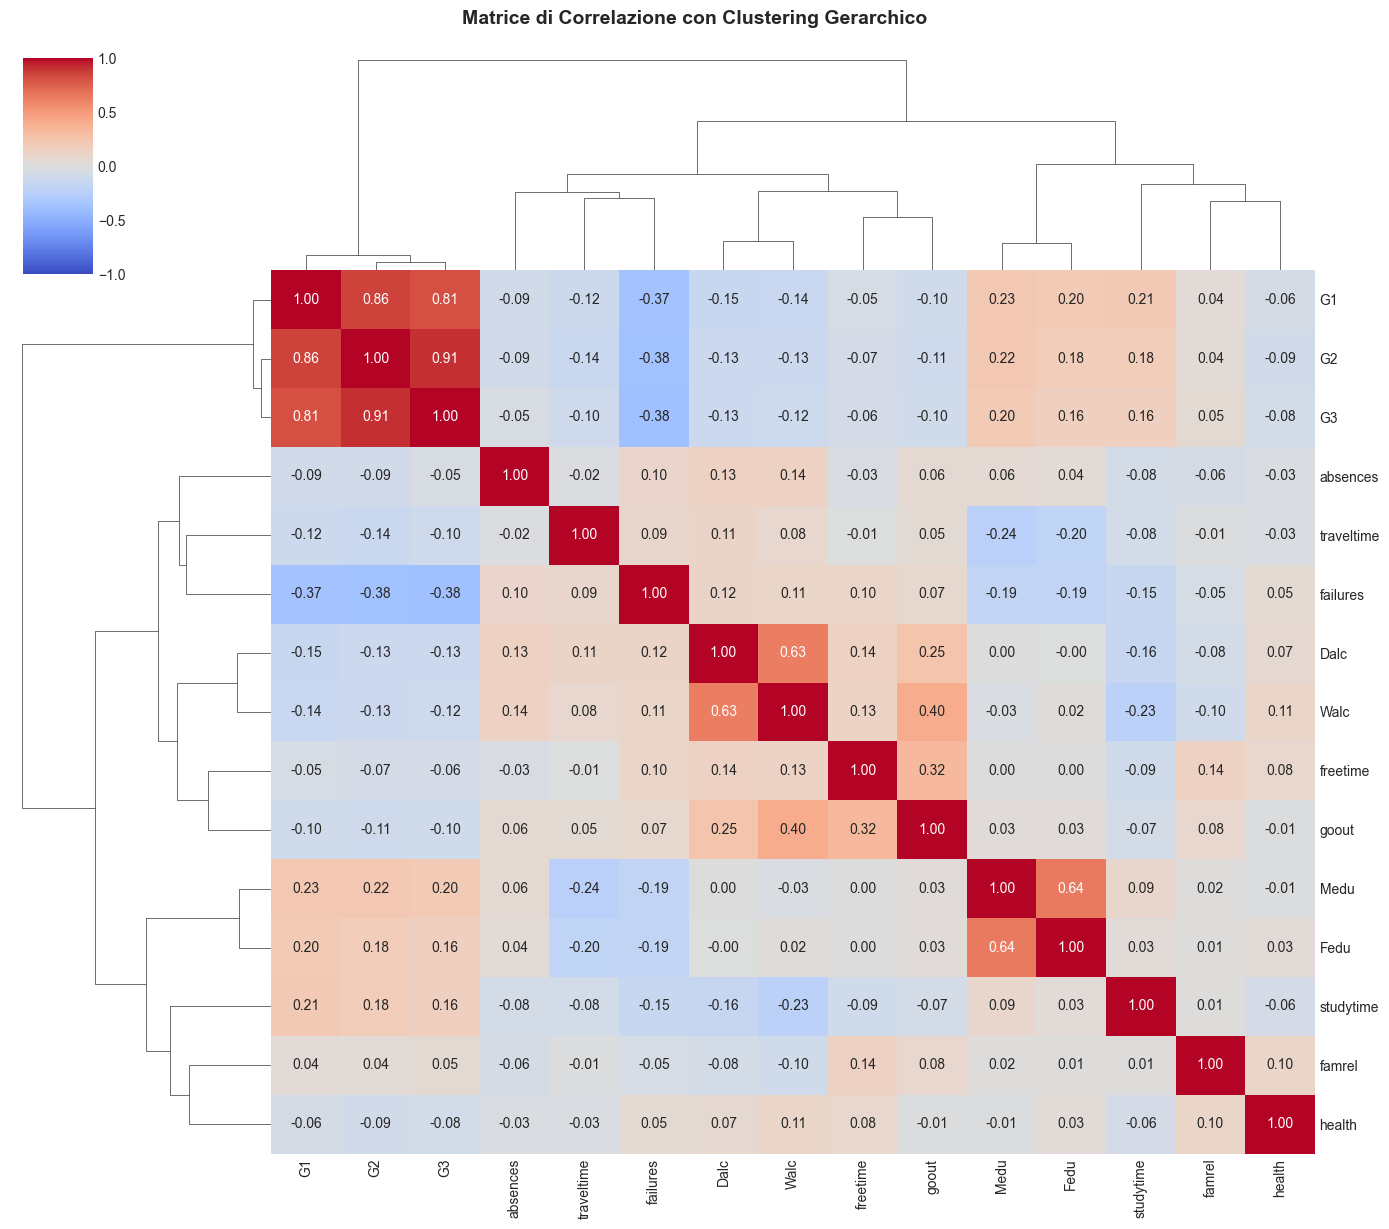

In [12]:
# Clustering gerarchico delle correlazioni

# Converti matrice di correlazione in distanze
distance_matrix = 1 - np.abs(corr_matrix)
condensed_distances = squareform(distance_matrix, checks=False)

# Calcola linkage
linkage_matrix = linkage(condensed_distances, method='ward')

# Crea dendrogramma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=corr_matrix.index, leaf_rotation=90)
plt.title('Dendrogramma: Clustering delle Variabili per Correlazione', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Variabili', fontsize=12)
plt.ylabel('Distanza', fontsize=12)
plt.tight_layout()
plt.show()

# Heatmap con clustering
g = sns.clustermap(corr_matrix, 
                   method='ward',
                   cmap='coolwarm',
                   center=0,
                   annot=True,
                   fmt='.2f',
                   figsize=(14, 12),
                   cbar_kws={"shrink": 0.8},
                   vmin=-1,
                   vmax=1)

g.fig.suptitle('Matrice di Correlazione con Clustering Gerarchico', 
               fontsize=14, fontweight='bold', y=1.02)
plt.show()
